## Processing a classification dataset

The dataset which will be used can be found here [Titanic](https://www.kaggle.com/competitions/titanic).

Main goal is to improve the general classification result which is defined as accuracy 

There will be: 
1. Checking the accuracy before applaing any preprocessing algorithms
2. Analyzing our data
3. Using preprocessing algorithms:
- Feature normalization and standardization
- Feature selection  
- Feature extraction
4. Comparing the results

In [1]:
### libraries
import umap
from sklearn.feature_selection import f_classif, GenericUnivariateSelect, chi2

import pandas as pd
import classification as clas
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Susanne\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# reading the data
data = pd.read_csv('train.csv')
train_df, test_df = clas.getTwoDatasets(data)

**1.Checking the accuracy**

In [3]:
# checking the initial accuarcy
pd.options.mode.copy_on_write = True

X_train = train_df[['Pclass','Age','Fare','Sex']]
X_train['Sex'] = X_train.Sex.copy().apply(lambda x : 1.0 if x == 'male' else 2.0).copy()
X_train = X_train.fillna(0)
y_train = train_df['Survived']

X_test = test_df[['Pclass','Age','Fare','Sex']]
X_test.Sex = X_test.Sex.apply(lambda x : 1.0 if x == 'male' else 2.0)
X_test = X_test.fillna(0)
y_test = test_df['Survived']

print("Accuracy before preprocessing: ", clas.getAccuracy(X_train, y_train,
                                                        X_test, y_test))

Accuracy before preprocessing:  0.6974789915966386


**2.Analyzing our data**

In [4]:
headers = train_df.columns.to_list()
procentage = []
for head in headers:
    procentage.append( round((train_df[head].nunique()/ len(train_df[head])),3))

variable_types = ['discrete (unique)', 'discrete', 'discrete', 'discrete', 'categorical', 'continuous', 'discrete', 'discrete', 'discrete', 'continuous', 'categorical','categorical']
variable_df = pd.DataFrame({'Column': headers, 'Variable_Type': variable_types, 'the percentage values of unique values': procentage})
variable_df

,Column,Variable_Type,the percentage values of unique values
0,PassengerId,discrete (unique),1.000
1,Survived,discrete,0.004
2,Pclass,discrete,0.006
3,Name,discrete,1.000
4,Sex,categorical,0.004
5,Age,continuous,0.144
6,SibSp,discrete,0.013
7,Parch,discrete,0.011
8,Ticket,discrete,0.835
9,Fare,continuous,0.375


- fill NaN values with mean value

In [5]:
# change all NaN values to mean or mode

# print('NaN values for Cabin: ',train_df['Cabin'].isnull().sum())
# print('NaN values for Age: ',train_df['Age'].isnull().sum())

train_df = clas.changeNullValuesToMean(train_df)

# print('NaN values for Cabin after: ',train_df['Cabin'].isnull().sum())
# print('NaN values for Age after: ',train_df['Age'].isnull().sum())

train_df = clas.changeCaterogicalToDescrite(train_df)
train_df.head()

NaN values for Cabin:  413
NaN values for Age:  111
Age was with NaN values
Cabin was with NaN values
NaN values for Cabin after:  0
NaN values for Age after:  0
columns to changed:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,68,1,22.0,1,0,328,7.2500,38,2
1,2,1,1,114,0,38.0,1,0,387,71.2833,49,0
2,3,1,3,205,0,26.0,0,0,437,7.9250,38,2
3,4,1,1,159,0,35.0,1,0,35,53.1000,32,2
4,5,0,3,7,1,35.0,0,0,296,8.0500,38,2


**3.1.Normalization and standarization**

In [6]:
## Normalization and standarization

normalized_data = clas.normalizeData(train_df, 'Survived')
normalized_data.head()

# scale = StandardScaler().fit(normalized_data) ->>> ???
# standarized_data = pd.DataFrame(scale.transform(normalized_data), columns=cols)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.000000,1.0,0.127580,1.0,0.302491,0.125,0.0,0.737079,0.014151,0.417582,0.666667
1,0.001876,0.0,0.213884,0.0,0.530249,0.125,0.0,0.869663,0.139136,0.538462,0.000000
2,0.003752,1.0,0.384615,0.0,0.359431,0.000,0.0,0.982022,0.015469,0.417582,0.666667
3,0.005629,0.0,0.298311,0.0,0.487544,0.125,0.0,0.078652,0.103644,0.351648,0.666667
4,0.007505,1.0,0.013133,1.0,0.487544,0.000,0.0,0.665169,0.015713,0.417582,0.666667


In [7]:
test_df = clas.changeNullValuesToMean(test_df)
test_df = clas.changeCaterogicalToDescrite(test_df)
normalized_data_test = clas.normalizeData(test_df, 'Survived')
normalized_data_test.head()

Age was with NaN values
Cabin was with NaN values
columns to changed:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.000000,1.0,0.134831,0.0,0.371701,0.0,0.000000,0.408497,0.016908,0.126761,0.666667
1,0.002809,0.5,0.396067,0.0,0.082684,0.0,0.333333,0.849673,0.051237,0.126761,0.666667
2,0.005618,0.0,0.129213,1.0,0.560191,0.0,0.000000,0.032680,0.051822,0.197183,0.666667
3,0.008427,0.0,0.553371,0.0,0.371701,0.0,0.000000,0.915033,0.207728,0.126761,0.000000
4,0.011236,1.0,0.789326,1.0,0.375848,0.0,0.000000,0.653595,0.028302,0.126761,0.666667


In [8]:
#### AFTER ###############

X = normalized_data
y = train_df['Survived']

X_test = normalized_data_test
y_test = test_df['Survived']

print("Accuracy after 1 step of preprocessing: ", clas.getAccuracy(X, y, X_test, y_test))

Accuracy after 1 step of preprocessing:  0.7871148459383753


**3.2.Feature selection**


1. Normalization and standrization do not have any influence on corellation, therefore we do it on the initialy dataframe to see correlation between target value and other attribute too. (Notice, that the correlation values don't change if we do not apply normalization schema). Present them on heatmap

2. Instead of using variances to collect the best features we will use the ranking function ([f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif)). This method calculates the F coefficients and p-values for each feature in the context of classification. The higher the F coefficient, the more significant the feature is for classification

<AxesSubplot: >

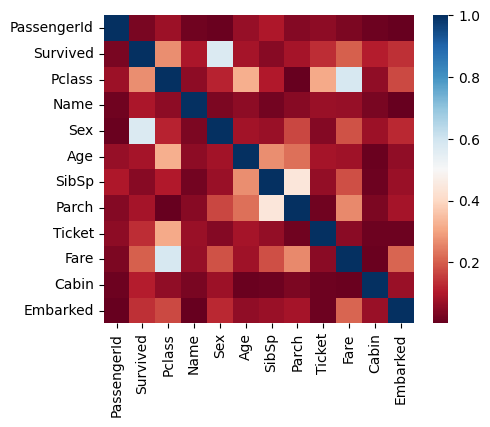

In [9]:
plt.figure(figsize=(5,4))
sns.heatmap(abs(train_df.corr()), cmap='RdBu')

[  0.46288574  41.56998554   4.66817704 262.65032831   3.81378144
   1.21353767   3.99840146   9.73500053  23.3426722    6.36952716
  10.36119727]


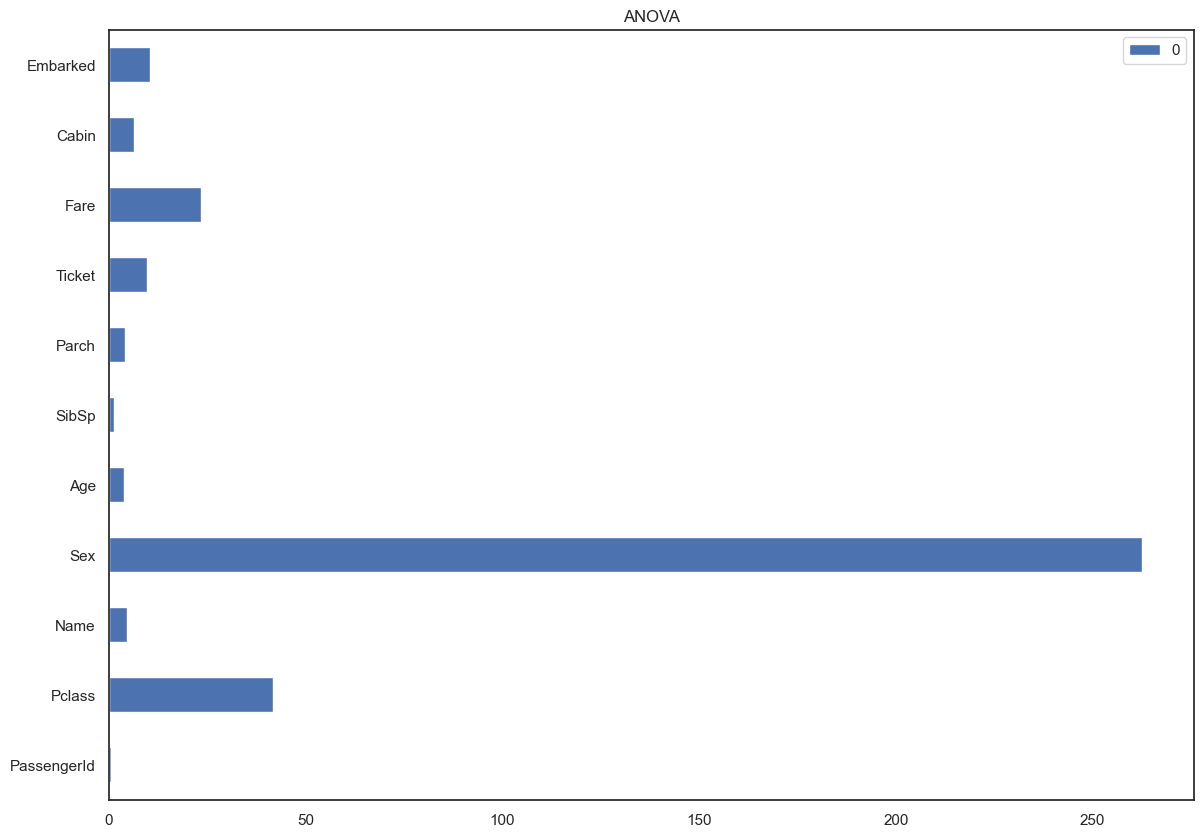

In [24]:
cols_all = train_df.columns.tolist()
cols = cols_all[:1] + cols_all[2:]
scores_anova, p_vals_anova = f_classif(normalized_data, train_df['Survived'])
pd.DataFrame(scores_anova, cols).plot(kind='barh', title='ANOVA')
print(scores_anova)

     Pclass  Sex      Fare  Embarked
0       1.0  1.0  0.014151  0.666667
1       0.0  0.0  0.139136  0.000000
2       1.0  0.0  0.015469  0.666667
3       0.0  0.0  0.103644  0.666667
4       1.0  1.0  0.015713  0.666667
..      ...  ...       ...       ...
529     0.5  1.0  0.022447  0.666667
530     0.5  0.0  0.050749  0.666667
531     1.0  1.0  0.014110  0.000000
532     1.0  1.0  0.014110  0.000000
533     1.0  0.0  0.043640  0.000000

[534 rows x 4 columns]


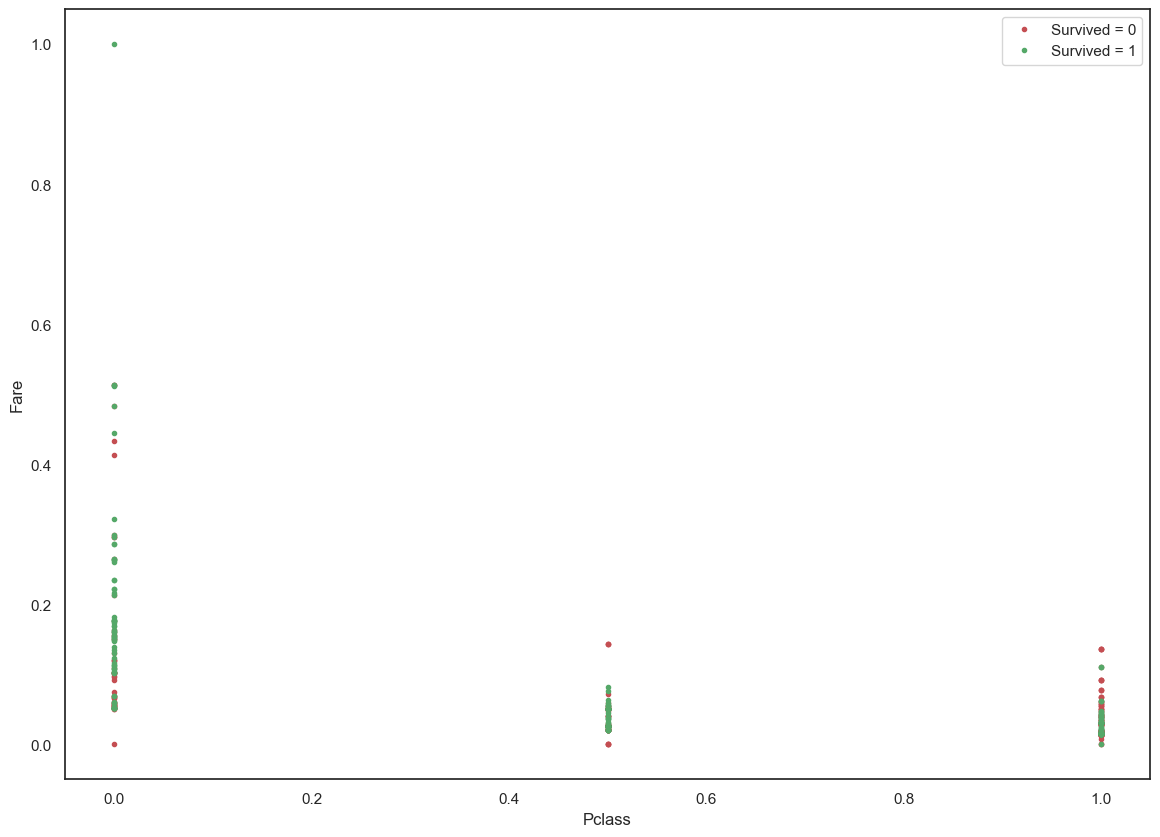

In [28]:
gus_object = GenericUnivariateSelect(chi2, mode='k_best', param=4) 

new_data = gus_object.fit_transform(normalized_data, train_df['Survived'])
new_dataframe = pd.DataFrame(new_data, columns=gus_object.get_feature_names_out())
print(new_dataframe) # we now all possible columns to choose

plt.plot(new_dataframe[new_dataframe.columns[0]][train_df['Survived'] == 0], new_dataframe[new_dataframe.columns[2]][train_df['Survived'] == 0], 'r.', label='Survived = 0')
plt.plot(new_dataframe[new_dataframe.columns[0]][train_df['Survived'] == 1], new_dataframe[new_dataframe.columns[2]][train_df['Survived'] == 1], 'g.', label='Survived = 1')
plt.xlabel(gus_object.get_feature_names_out()[0])
plt.ylabel(gus_object.get_feature_names_out()[2])
plt.legend()
plt.show()

Summary:

- From heatmap, we can get info that the 'Patch' or 'SibSp' can be delated becasue they are high correleted
- From the ANOVA plot we know that 'Sex','Pclass' and 'Fare' are good for ou classification
- The last plot is not good, because we do not have much continuous values, therfore it mostly makes 2 or 4 points on the plot only

In [26]:
##### droping some columns
columns_to_stay = ['Sex', 'Fare', 'Pclass', 'Survived', 'Embarked']
for column in train_df.columns.tolist():
    if column not in columns_to_stay:
        normalized_data.drop(column, axis=1, inplace=True)
        normalized_data_test.drop(column, axis=1, inplace=True)

#  checking the accuraccy after

X = normalized_data
y = train_df['Survived']

X_test = normalized_data_test
y_test = test_df['Survived']

print("Accuracy after 2 step of preprocessing: ", clas.getAccuracy(X, y, X_test, y_test))

Accuracy after 2 step of preprocessing:  0.8011204481792717


**3.3.Feature extraction**

In [ ]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
df = pd.DataFrame(data_df, columns=data_df.columns.tolist())
sns.pairplot(df, hue='Survived')

In [10]:
y = data_df['Survived']
df = pd.DataFrame(data_df, columns=data_df.columns.tolist())

umap_transformer = umap.UMAP(
    n_neighbors=9,
    n_components=4,
    min_dist=0.2
)

X_umap = umap_transformer.fit_transform(normalized_data)
X_umap_2 = umap_transformer.fit_transform(normalized_data_2)

sns.scatterplot(data=df, x=X_umap[:, 0], y=X_umap[:, 1], hue=y).set_title('UMAP projection of Titanic dataset')

NameError: name 'data_df' is not defined

Summary:
- from previous plot nothing special only combantion of 'Sex' and 'Cabin maybe
- we have to use UMAP, because other two functions need number of components and it is min from (number of features and unique class type-1). In our case it's 1 therefore we have only one axis and i dont know how to plot it then

In [ ]:
#  checking the accuraccy after
#### AFTER  SELECTION ####################### CORRECT?

X = X_umap
y = data_df['Survived']
y = y.to_numpy()

X_test = X_umap_2
y_test = test_df['Survived']
y_test = y_test.to_numpy()

classifier.fit(X,y)
predicts = classifier.predict(X_test)
report = classification_report(y_test, predicts)
accuracy_after_3 = accuracy_score(y_test, predicts)

print("Accuracy after preprocessing: ", accuracy_after_3)

**4.Comparing results**

In [ ]:
print("Accuracy before preprocessing: ", accuracy_before)
print("Accuracy after 1 preprocessing: ", accuracy_after_1)
print("Accuracy after 2 preprocessing: ", accuracy_after_2)
print("Accuracy after 3 preprocessing: ", accuracy_after_3)